In [121]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns
import pandas_profiling

from collections import Counter
%matplotlib inline

In [122]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_mode_interactivity = "all"

In [123]:
bank_input=pd.read_csv(r'bank-full.csv')

In [124]:
#report = pandas_profiling.ProfileReport(bank_input)
#covert profile report as html file
#report.to_file("bank_data.html")


In [125]:
 bank_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [126]:
bank_input['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

### Data exploration

Text(-10.825,0.5,'Balance')

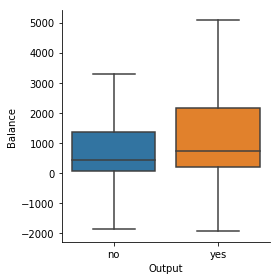

In [127]:
sns.factorplot(x='y',y='balance',
               data=bank_input,kind='box', showfliers = False)
plt.xlabel("Output")
plt.ylabel("Balance")

In [128]:
def convert_output(output):
    if output == 'no':
        output=0
    else:
        output=1
    return output
      
bank_input['output'] = bank_input['y'].apply(convert_output)

In [129]:
def convert_pday(pday):
    if pday <0:
        pday=0
    return pday
      
bank_input['pdays'] = bank_input['pdays'].apply(convert_pday)

<Figure size 720x360 with 0 Axes>

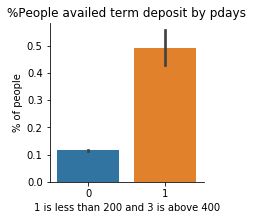

In [130]:
def convert_day(pday):
    if pday >400:
        pday=1
    else:
        pday=0
    return pday
      
bank_input['pdays_cat'] = bank_input['pdays'].apply(convert_day)


plt.figure(figsize=(10,5))
mx = sns.factorplot(x="pdays_cat", y="output", data=bank_input, kind="bar", size=3)
mx.set(ylabel='% of people')
plt.title('%People availed term deposit by pdays');
plt.xlabel('1 is less than 200 and 3 is above 400')
plt.show()

<Figure size 720x360 with 0 Axes>

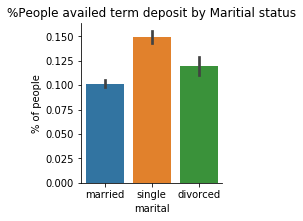

In [131]:
plt.figure(figsize=(10,5))
mx = sns.factorplot(x="marital", y="output", data=bank_input, kind="bar", size=3)
mx.set(ylabel='% of people')
plt.title('%People availed term deposit by Maritial status');
plt.show()


<Figure size 720x216 with 0 Axes>

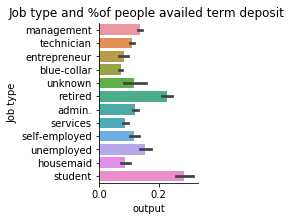

In [132]:
plt.figure(figsize=(10,3))
mx = sns.factorplot(y="job",x="output", data=bank_input, kind="bar", size=3)
mx.set(ylabel='Job type')
plt.title('Job type and %of people availed term deposit ');
plt.show()

Text(0.5,0.98,'Count plot of term deposit taken Vs education')

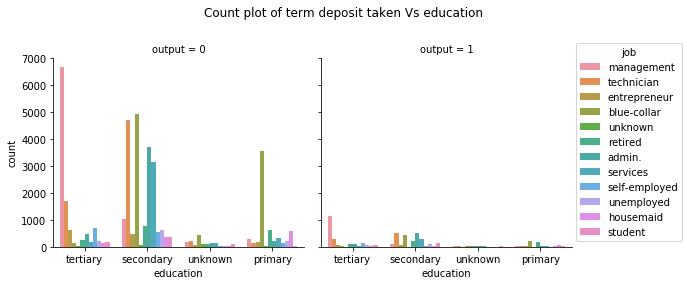

In [133]:
sns.factorplot('education', data=bank_input, kind='count', hue="job",col="output")
plt.subplots_adjust(top=.8)
plt.suptitle('Count plot of term deposit taken Vs education')

<Figure size 720x216 with 0 Axes>

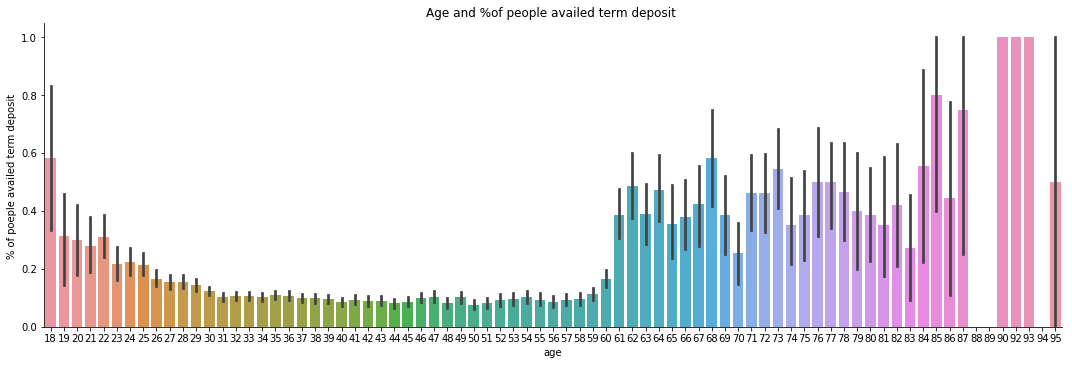

In [134]:
plt.figure(figsize=(10,3))
mx = sns.factorplot(x="age",y="output", data=bank_input, kind="bar", size=5,aspect=3)
mx.set(ylabel='% of poeple availed term deposit ')
plt.title('Age and %of people availed term deposit ');
plt.show()

C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Agewise distribution of the people')

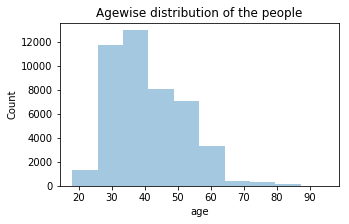

In [135]:
plt.figure(figsize=(5,3))
sns.distplot(bank_input['age'], bins=10, kde=False)
plt.ylabel('Count')
plt.title('Agewise distribution of the people')

Text(0.5,0.98,'Scatterplot of poeple grouped by balance and Age')

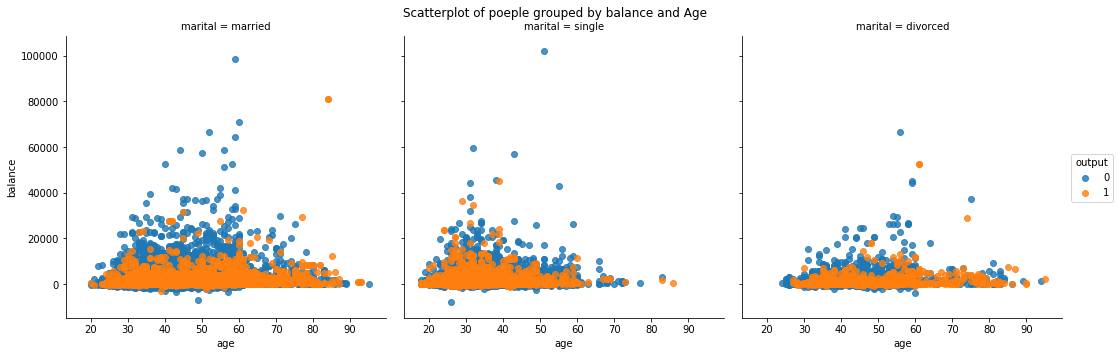

In [136]:
sns.lmplot('age', 'balance', data=bank_input, fit_reg=False, hue="output",col="marital")
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of poeple grouped by balance and Age')

<Figure size 720x360 with 0 Axes>

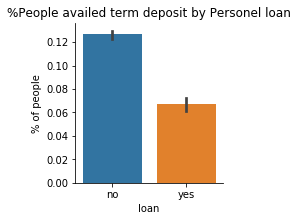

In [137]:
plt.figure(figsize=(10,5))
mx = sns.factorplot(x="loan", y="output", data=bank_input, kind="bar", size=3)
mx.set(ylabel='% of people')
plt.title('%People availed term deposit by Personel loan');
plt.show()

<Figure size 720x216 with 0 Axes>

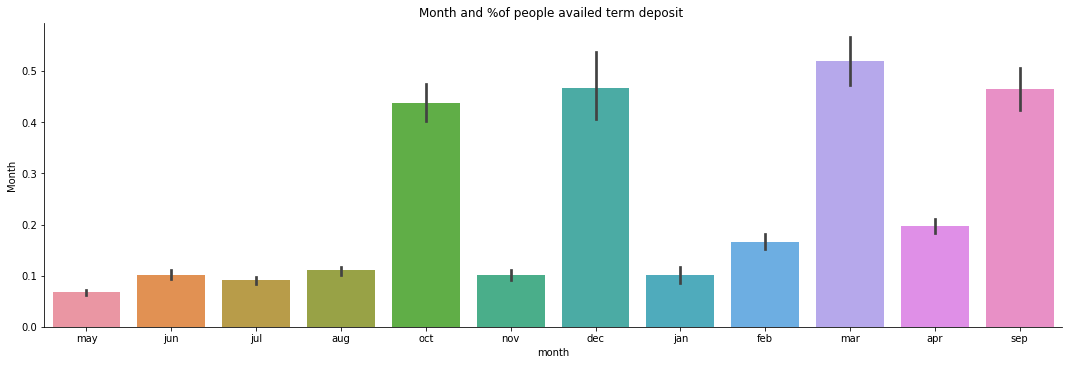

In [138]:
plt.figure(figsize=(10,3))
mx = sns.factorplot(x="month",y="output", data=bank_input, kind="bar", size=5,aspect=3)
mx.set(ylabel='Month')
plt.title('Month and %of people availed term deposit ');
plt.show()

<Figure size 720x216 with 0 Axes>

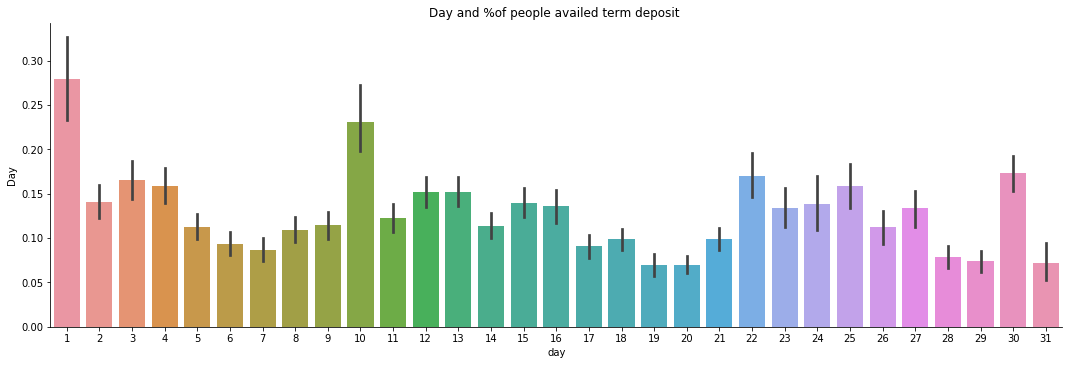

In [139]:
plt.figure(figsize=(10,3))
mx = sns.factorplot(x="day",y="output", data=bank_input, kind="bar", size=5,aspect=3)
mx.set(ylabel='Day')
plt.title('Day and %of people availed term deposit ');
plt.show()

<Figure size 360x144 with 0 Axes>

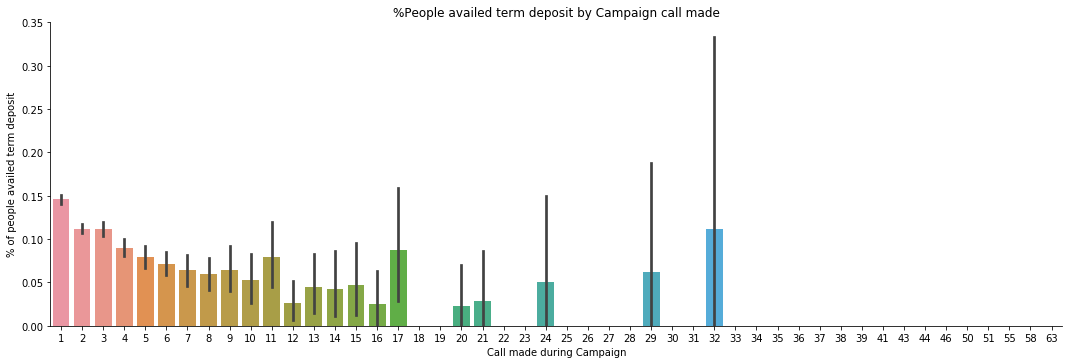

In [140]:
plt.figure(figsize=(5,2))
mx = sns.factorplot(x="campaign", y="output", data=bank_input, kind="bar", size=5 ,aspect=3)
mx.set(xlabel='Call made during Campaign')
mx.set(ylabel='% of people availed term deposit')
plt.title('%People availed term deposit by Campaign call made');
plt.show()


<Figure size 360x144 with 0 Axes>

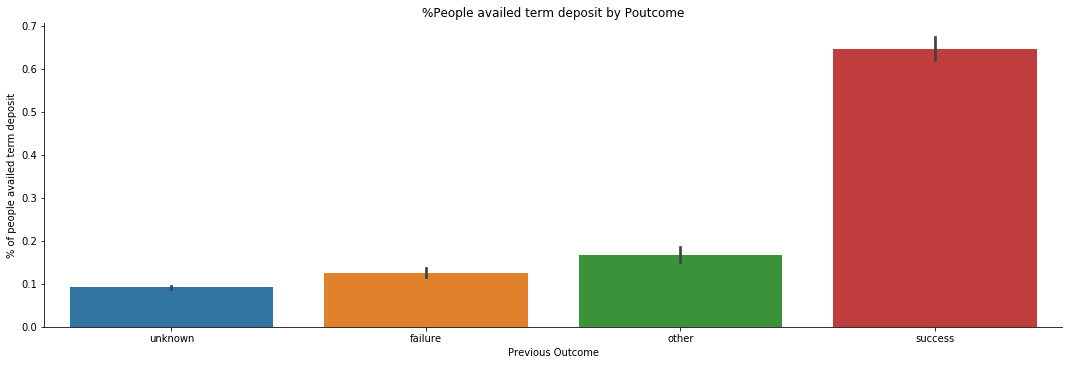

In [141]:
plt.figure(figsize=(5,2))
mx = sns.factorplot(x="poutcome", y="output", data=bank_input, kind="bar", size=5 ,aspect=3)
mx.set(xlabel='Previous Outcome')
mx.set(ylabel='% of people availed term deposit')
plt.title('%People availed term deposit by Poutcome');
plt.show()


Text(0.5,1,'Scatterplot of poeple grouped by balance and Age')

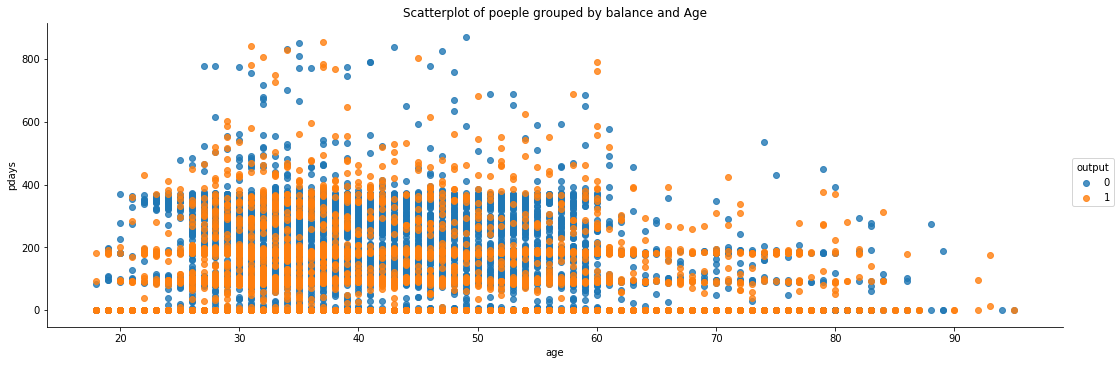

In [142]:
sns.lmplot('age', 'pdays', data=bank_input, fit_reg=False, hue="output",size=5,aspect=3)

plt.title('Scatterplot of poeple grouped by balance and Age')

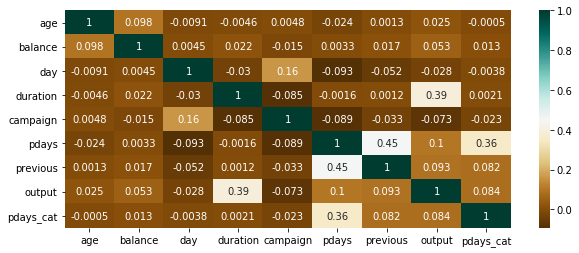

In [143]:
corr =bank_input.corr()

plt.figure(figsize=(10,4))
sns.heatmap(corr,cmap="BrBG",annot = True)
plt.show()

### 4. Feature Engineering  <a id='feature'>

In [144]:
bank_input.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,output,pdays_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no,0,0


In [145]:
# agegroup below 30 and above 59 as a categorical feature
def age_output(age):
    if age <31:
        age=1
    elif age>59:
        age=3
    else:
        age=2
    return age
      
bank_input['is_sing_ret'] = bank_input['age'].apply(age_output)

In [146]:
# Previous contact made as a categorical feature
def prev_output(prev):
    if prev <11 :
        prev=1
    else:
        prev=0
    return prev
      
bank_input['is_prev10'] = bank_input['previous'].apply(prev_output)

In [147]:
# First 3 campaign call as a categorical feature
def camp_output(camp):
    if camp <25 :
        camp=1
    else:
        camp=0
    return camp
      
bank_input['is_camp25'] = bank_input['campaign'].apply(camp_output)

In [148]:
# First 10 days of call as a categorical feature
def day_output(day):
    if day <11 :
        day=1
    else:
        day=0
    return day
      
bank_input['is_day10'] = bank_input['day'].apply(day_output)

In [149]:
# Dropping not required column
bank_input.drop('duration',inplace= True,axis=1)

from sklearn.preprocessing import LabelEncoder
#encoding_list = ['education',  'contact','job','poutcome']
#bank_input[encoding_list] = bank_input[encoding_list].apply(LabelEncoder().fit_transform)
bank_input.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,output,pdays_cat,is_sing_ret,is_prev10,is_camp25,is_day10
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,unknown,no,0,0,2,1,1,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,unknown,no,0,0,2,1,1,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,unknown,no,0,0,2,1,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,unknown,no,0,0,2,1,1,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,unknown,no,0,0,2,1,1,1


In [150]:
# Convert Categorical to Numerical for default column
job_dummies = pd.get_dummies(bank_input.job, prefix='job')
marital_dummies = pd.get_dummies(bank_input.marital, prefix='marital')
credit_dummies = pd.get_dummies(bank_input.default, prefix='crddefault')
housing_dummies = pd.get_dummies(bank_input.housing, prefix='housloan')
personel_dummies= pd.get_dummies(bank_input.loan, prefix='perloan')
month_dummies=pd.get_dummies(bank_input.month, prefix='month')
education_dummies=pd.get_dummies(bank_input.education, prefix='education')
contact_dummies=pd.get_dummies(bank_input.contact, prefix='contact')
#week_dummies=pd.get_dummies(bank_input.is_week, prefix='week')
poutcome_dummies=pd.get_dummies(bank_input.poutcome, prefix='poutcome')
age_dummies = pd.get_dummies(bank_input.is_sing_ret, prefix='age_')
pdays_dummies = pd.get_dummies(bank_input.pdays_cat, prefix='pdays_')

In [151]:
bank_input = pd.concat([bank_input,job_dummies], axis=1)
bank_input = pd.concat([bank_input,marital_dummies], axis=1)
bank_input = pd.concat([bank_input,credit_dummies], axis=1)
bank_input = pd.concat([bank_input,housing_dummies], axis=1)
bank_input = pd.concat([bank_input,personel_dummies], axis=1)
bank_input = pd.concat([bank_input,month_dummies], axis=1)
bank_input = pd.concat([bank_input,education_dummies], axis=1)
bank_input = pd.concat([bank_input,contact_dummies], axis=1)
#bank_input = pd.concat([bank_input,week_dummies], axis=1)
bank_input = pd.concat([bank_input,poutcome_dummies], axis=1)
bank_input = pd.concat([bank_input,age_dummies], axis=1)
bank_input = pd.concat([bank_input,pdays_dummies], axis=1)

In [152]:
bank_input.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age__1,age__2,age__3,pdays__0,pdays__1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,0,0,0,1,0,1,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,0,1,0,1,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,1,0,1,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,0,0,0,1,0,1,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,0,1,0,1,0,1,0


In [153]:
df= bank_input.drop(['is_sing_ret','job_unknown','poutcome_unknown','contact_unknown','campaign','month_jan','month_feb','month_may','month_jul','month_nov','month_jan','age','day','education','contact','job','pdays','previous','poutcome','balance','marital','default','housing','loan','month','y'],axis=1)
df.head()

,output,pdays_cat,is_prev10,is_camp25,is_day10,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,age__1,age__2,age__3,pdays__0,pdays__1
0,0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [154]:
#df.info()

In [155]:
#splitting the features and labels

X = df.drop('output',axis = 1)
y = df['output']

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
        
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True
            print('Remaining variables:')
            print(X.columns[variables])
    return X[cols[variables]]
X = calculate_vif_(X,5)

dropping 'pdays__1' at index: 44
Remaining variables:
Index(['pdays_cat', 'is_prev10', 'is_camp25', 'is_day10', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'crddefault_no', 'crddefault_yes',
       'housloan_no', 'housloan_yes', 'perloan_no', 'perloan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jun', 'month_mar', 'month_oct',
       'month_sep', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'age__1', 'age__2', 'age__3', 'pdays__0'],
      dtype='object')
dropping 'pdays_cat' at index: 0
Remaining variables:
Index(['is_prev10', 'is_camp25', 'is_day10', 'job_admin.', 'job_blue-collar',
 

C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'housloan_no' at index: 17
Remaining variables:
Index(['is_prev10', 'is_camp25', 'is_day10', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single', 'crddefault_no',
       'housloan_yes', 'perloan_no', 'perloan_yes', 'month_apr', 'month_aug',
       'month_dec', 'month_jun', 'month_mar', 'month_oct', 'month_sep',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'age__1', 'age__2', 'pdays__0'],
      dtype='object')
dropping 'perloan_no' at index: 18
Remaining variables:
Index(['is_prev10', 'is_camp25', 'is_day10', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'j

In [156]:
# splitting the data into train and test with 70:30 ratio

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [96]:
# Building logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(penalty='l2',solver='liblinear',C=1e42) # Set Large C value for low regularization to prevent overfitting

In [97]:
# fitting logistic regression model with x and y attributes of train data

logreg.fit(x_train, y_train)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
#find key predictors of Term co-efff
coeff=pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))],axis=1)
coeff.columns=("Variables","Co-eff")
coeff.sort_values("Co-eff",ascending = False)

,Variables,Co-eff
27,poutcome_success,2.505720
19,month_mar,1.779469
20,month_oct,1.420147
21,month_sep,1.308232
17,month_dec,1.271304
15,month_apr,0.933220
6,job_retired,0.870697
11,job_unemployed,0.636822
9,job_student,0.575176
26,poutcome_other,0.495893


In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 29 columns):
is_day10              45211 non-null int64
job_admin.            45211 non-null uint8
job_blue-collar       45211 non-null uint8
job_entrepreneur      45211 non-null uint8
job_housemaid         45211 non-null uint8
job_management        45211 non-null uint8
job_retired           45211 non-null uint8
job_self-employed     45211 non-null uint8
job_services          45211 non-null uint8
job_student           45211 non-null uint8
job_technician        45211 non-null uint8
job_unemployed        45211 non-null uint8
marital_single        45211 non-null uint8
housloan_yes          45211 non-null uint8
perloan_yes           45211 non-null uint8
month_apr             45211 non-null uint8
month_aug             45211 non-null uint8
month_dec             45211 non-null uint8
month_jun             45211 non-null uint8
month_mar             45211 non-null uint8
month_oct             45211 non

In [100]:
# now applying our learnt model on test and also on train data

y_pred_test = logreg.predict(x_test)

### 7. Metrics for Logistic Regression  <a id='metrics'>

In [101]:
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

Test Accuracy:  0.8911825420230021


In [102]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_pred_test)

In [103]:
# Actual Values of y_train
y_train.value_counts()
# Visualizing the output of Logistic Regression based on the X inputs and y_pred

logreg.predict_proba(X)                               


array([[0.9349012 , 0.0650988 ],
       [0.93750135, 0.06249865],
       [0.96792333, 0.03207667],
       ...,
       [0.31311033, 0.68688967],
       [0.91727386, 0.08272614],
       [0.8637387 , 0.1362613 ]])

In [104]:
# Actual Values of y_test
y_test.value_counts()

0    11966
1     1598
Name: output, dtype: int64

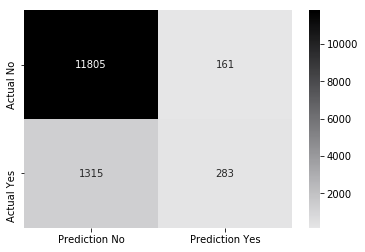

In [105]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [106]:
# Creating Classification Report

cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

             precision    recall  f1-score   support

          0       0.90      0.99      0.94     11966
          1       0.64      0.18      0.28      1598

avg / total       0.87      0.89      0.86     13564



### 7. Metrics for Lasso and Ridge Regression  <a id='metrics'>

In [107]:
# Building logistic regression model

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
lassoreg = Lasso(penalty =l1)
ridgereg = Ridge(penalty =l1)

NameError: name 'l1' is not defined

In [ ]:
# fitting logistic regression model with x and y attributes of train data
lassoreg.fit(x_train, y_train)
ridgereg.fit(x_train, y_train)

In [ ]:
#find key predictors of Term co-efff
coeff=pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lassoreg.coef_))],axis=1)
coeff.columns=("Variables","Co-eff")
coeff.sort_values("Co-eff",ascending = False)

In [ ]:
# now applying our learnt model on test and also on train data

y_pred_test_lasso = lassoreg.predict(x_test)
y_pred_test_ridge = ridgereg.predict(x_test)

### 7. Metrics for Lasso and Rideg  Regression  <a id='metrics'>

In [110]:
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy_lasso: ", metrics.accuracy_score(y_test, y_pred_test_lasso))
print("Test Accuracy_ridge: ", metrics.accuracy_score(y_test, y_pred_test_ridge))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
# creating a confusion matrix to understand the classification
conf_lasso = metrics.confusion_matrix(y_test, y_pred_test_lasso)
conf_ridge = metrics.confusion_matrix(y_test, y_pred_test_ridge)

In [ ]:
# Actual Values of y_test
y_test.value_counts()

In [108]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf_lasso,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

NameError: name 'conf_lasso' is not defined

In [109]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf_ridge,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

NameError: name 'conf_ridge' is not defined

In [ ]:
# Creating Classification Report

cr = metrics.classification_report(y_test, y_pred_test_lasso)
print(cr)

In [ ]:
# Creating Classification Report

cr = metrics.classification_report(y_test, y_pred_test_ridge)
print(cr)

### 6. Random Forest  <a id='rf'>

In [157]:
# Building and fitting Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 1)

### 6.1 Training Random Forest Model  <a id='trf'>

In [158]:
# Fitting the model on Train Data

my_forest = forest.fit(x_train, y_train)

In [159]:
# Print the accuracy score of the fitted random forest

print(my_forest.score(x_train, y_train))

0.8998009289980093


 ### 6.2 Predictions from Random Forest Model   <a id='prf'>

In [160]:
# Making predictions

pred = my_forest.predict(x_test)

### 6.3 Evaluating the Random Forest Model   <a id='erf'>

In [161]:
df_confusion_rf = metrics.confusion_matrix(y_test, pred)
df_confusion_rf

array([[11846,   120],
       [ 1333,   265]], dtype=int64)

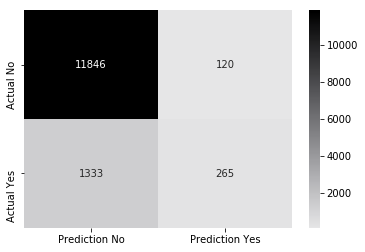

In [162]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_rf, cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [163]:
# Creating Classification Report

cr = metrics.classification_report(y_test, pred)
print(cr)

             precision    recall  f1-score   support

          0       0.90      0.99      0.94     11966
          1       0.69      0.17      0.27      1598

avg / total       0.87      0.89      0.86     13564

